<a href="https://colab.research.google.com/github/ViniciusKanh/ObesityDataMining_UNESP/blob/main/AnaliseObesidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pr√©-Processamento

In [ ]:
from google.colab import files
import pandas as pd

# Fazer upload do arquivo
uploaded = files.upload()

# Carregar o dataset
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Exibir as primeiras linhas do dataset
data.head()

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

## An√°lise Inicial dos Dados

In [ ]:
# Verificar informa√ß√µes gerais sobre o dataset
data.info()

# Resumo estat√≠stico das vari√°veis num√©ricas
data.describe()

# Verificar a exist√™ncia de valores ausentes
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## Tratamento de Valores Ausentes

In [ ]:
# Remover linhas com valores ausentes
data_cleaned = data.dropna()

data['Height'].fillna(data['Height'].mean(), inplace=True)
data['FAVC'].fillna(data['FAVC'].mode()[0], inplace=True)


<ipython-input-3-e6b49e89a074>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Height'].fillna(data['Height'].mean(), inplace=True)
<ipython-input-3-e6b49e89a074>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

## Convers√£o de Vari√°veis Categ√≥ricas

In [ ]:
# Converter vari√°veis categ√≥ricas em vari√°veis num√©ricas usando OneHotEncoder ou LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Exemplo com LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = label_encoder.fit_transform(data['FAVC'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])

# Verificar as colunas categ√≥ricas restantes
data.select_dtypes(include=['object']).head()


CAEC  SCC        CALC                 MTRANS           NObeyesdad
0  Sometimes   no          no  Public_Transportation        Normal_Weight
1  Sometimes  yes   Sometimes  Public_Transportation        Normal_Weight
2  Sometimes   no  Frequently  Public_Transportation        Normal_Weight
3  Sometimes   no  Frequently                Walking   Overweight_Level_I
4  Sometimes   no   Sometimes  Public_Transportation  Overweight_Level_II

## An√°lise de Outliers

Outliers s√£o valores que est√£o muito distantes da maioria dos dados e podem distorcer os resultados de alguns algoritmos de ML. Antes da normaliza√ß√£o, √© uma boa pr√°tica visualiz√°-los e decidir se devem ser removidos ou tratados.

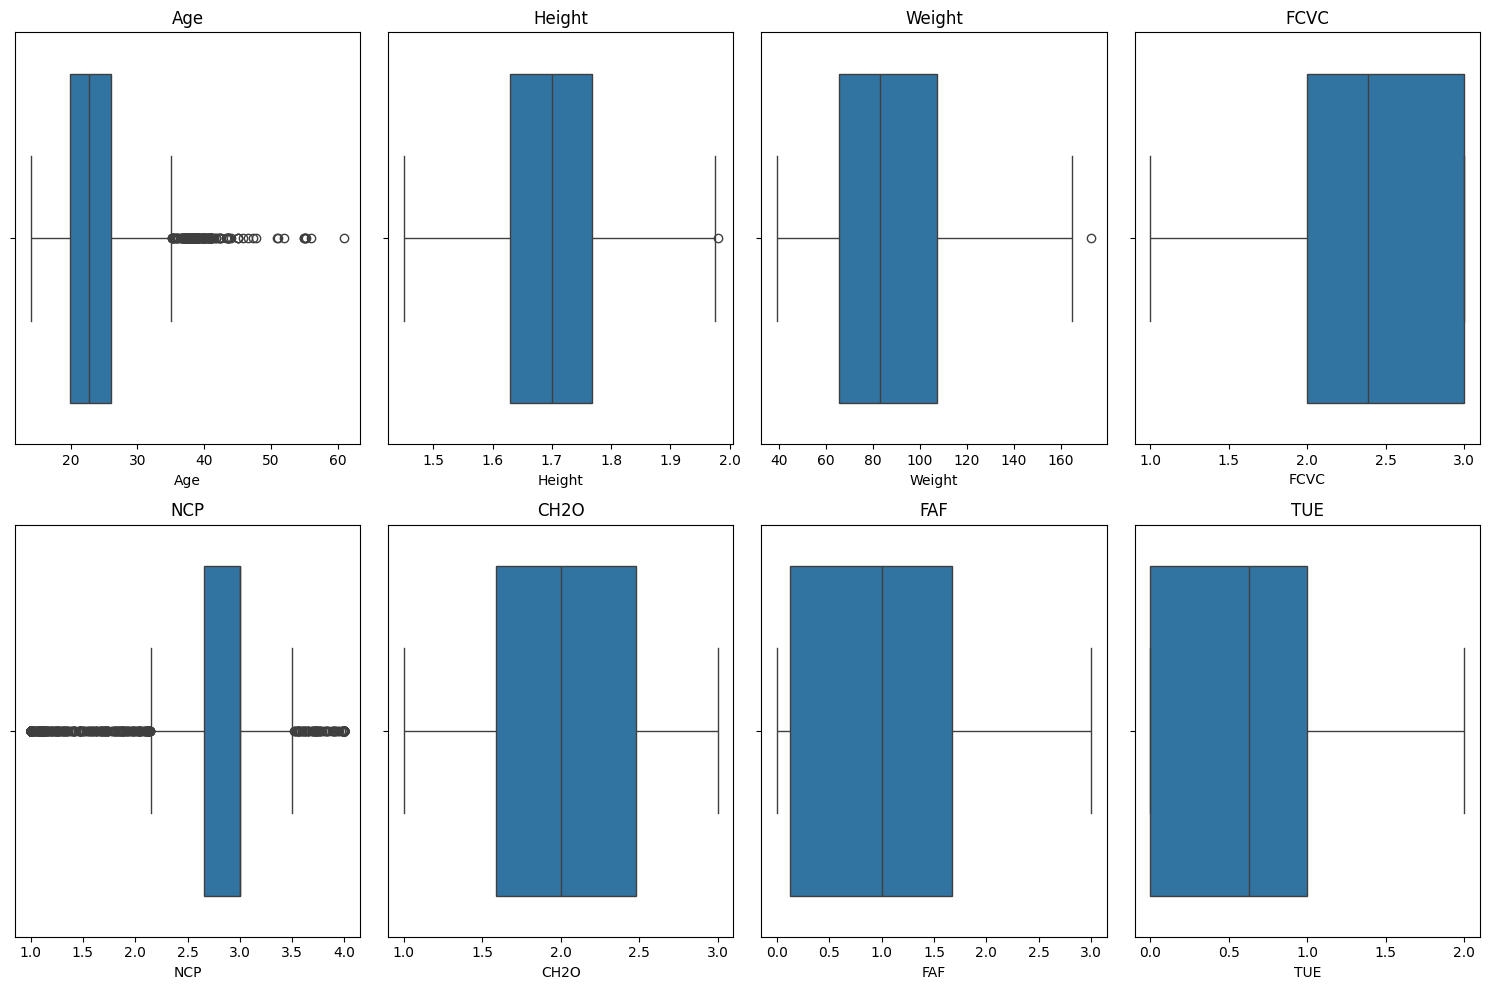

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um boxplot para cada vari√°vel num√©rica
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


# An√°lise e Interpreta√ß√£o dos Outliers üìä




A partir dos gr√°ficos de **boxplot** gerados, podemos identificar algumas informa√ß√µes importantes sobre os outliers presentes nas vari√°veis num√©ricas do dataset. Vamos analisar cada uma delas em detalhes:

## 1. Age (Idade)
üìå **Observa√ß√µes**:  
- H√° um grande n√∫mero de outliers na faixa de idade superior a 40 anos.  
- Isso pode indicar que a maioria das pessoas no dataset tem menos de 40 anos, o que torna idades mais avan√ßadas incomuns no conjunto de dados.  

üéØ **Interpreta√ß√£o**:  
- O grupo de pessoas acima de 40 anos representa uma minoria, o que pode ser importante ao considerar segmenta√ß√µes por idade. Dependendo do modelo de Machine Learning, pode ser necess√°rio tratar esses outliers.

## 2. Height (Altura)
üìå **Observa√ß√µes**:  
- A maioria dos dados de altura est√° concentrada entre 1,5m e 1,8m, com poucos outliers acima de 1,9m.  
- Esses outliers representam pessoas excepcionalmente altas.  

üéØ **Interpreta√ß√£o**:  
- Pessoas muito altas s√£o raras no dataset, mas os outliers n√£o parecem extremos. Dependendo do seu objetivo, pode ser interessante mant√™-los.

## 3. Weight (Peso)
üìå **Observa√ß√µes**:  
- O peso varia de forma concentrada, com a maioria das observa√ß√µes entre 40kg e 120kg.  
- Existem alguns outliers para pesos mais altos (acima de 150kg).  

üéØ **Interpreta√ß√£o**:  
- Pessoas com peso significativamente alto s√£o raras e podem estar associadas a casos extremos de obesidade. Se o foco do projeto for analisar padr√µes de obesidade, esses outliers podem ser importantes.

## 4. FCVC (Consumo de Vegetais)
üìå **Observa√ß√µes**:  
- N√£o h√° outliers significativos para o consumo de vegetais, o que indica que a maioria das pessoas segue padr√µes semelhantes nessa vari√°vel.  

üéØ **Interpreta√ß√£o**:  
- O consumo de vegetais parece estar distribu√≠do de forma equilibrada no dataset, sem a necessidade de grandes interven√ß√µes.

## 5. NCP (N√∫mero de Refei√ß√µes por Dia)
üìå **Observa√ß√µes**:  
- H√° um n√∫mero consider√°vel de outliers para valores baixos (entre 1 e 2 refei√ß√µes por dia).  
- A maioria das pessoas faz entre 2 e 3 refei√ß√µes di√°rias.  

üéØ **Interpreta√ß√£o**:  
- As pessoas que consomem menos refei√ß√µes di√°rias s√£o uma minoria e podem representar h√°bitos alimentares n√£o convencionais. Se o foco for analisar o impacto da alimenta√ß√£o na obesidade, esses outliers podem ser relevantes.

## 6. CH2O (Consumo de √Ågua)
üìå **Observa√ß√µes**:  
- A distribui√ß√£o de consumo de √°gua √© bastante equilibrada, sem outliers vis√≠veis.  

üéØ **Interpreta√ß√£o**:  
- A vari√°vel de consumo de √°gua parece bem comportada, indicando que n√£o h√° casos extremos.

## 7. FAF (Atividade F√≠sica)
üìå **Observa√ß√µes**:  
- N√£o h√° outliers significativos na vari√°vel de frequ√™ncia de atividade f√≠sica.  

üéØ **Interpreta√ß√£o**:  
- A frequ√™ncia de atividade f√≠sica √© relativamente est√°vel entre os participantes, sem necessidade de tratamento de outliers aqui.

## 8. TUE (Uso de Tecnologia)
üìå **Observa√ß√µes**:  
- Sem outliers vis√≠veis, o uso de tecnologia parece estar distribu√≠do de forma equilibrada.  

üéØ **Interpreta√ß√£o**:  
- N√£o h√° casos extremos para o tempo de uso de tecnologia, o que indica uma varia√ß√£o regular.

---

# Conclus√£o Geral üìà

- As vari√°veis **Age**, **Weight** e **NCP** apresentam outliers que podem ser significativos dependendo do objetivo do projeto. Se esses outliers n√£o forem tratados, eles podem impactar a performance dos modelos de Machine Learning.  
- Vari√°veis como **Height** e **FCVC** possuem alguns outliers, mas nada que seja alarmante.  
- Para vari√°veis como **CH2O**, **FAF** e **TUE**, a distribui√ß√£o parece est√°vel, e n√£o h√° a necessidade de remover outliers.  

Essa an√°lise detalhada dos outliers permite que voc√™ tome decis√µes informadas sobre como tratar os dados para que o modelo final tenha um bom desempenho e reflita corretamente as tend√™ncias do dataset! üéØ

## Tratamento dos Outliers

In [ ]:
# Fun√ß√£o para remover outliers com base no IQR (Intervalo Interquartil)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Aplicar a fun√ß√£o para as vari√°veis com outliers
columns_with_outliers = ['Age', 'Weight', 'NCP']
for column in columns_with_outliers:
    data = remove_outliers(data, column)

# Verificar a nova dimens√£o do dataset ap√≥s a remo√ß√£o dos outliers
data.shape


(1399, 17)

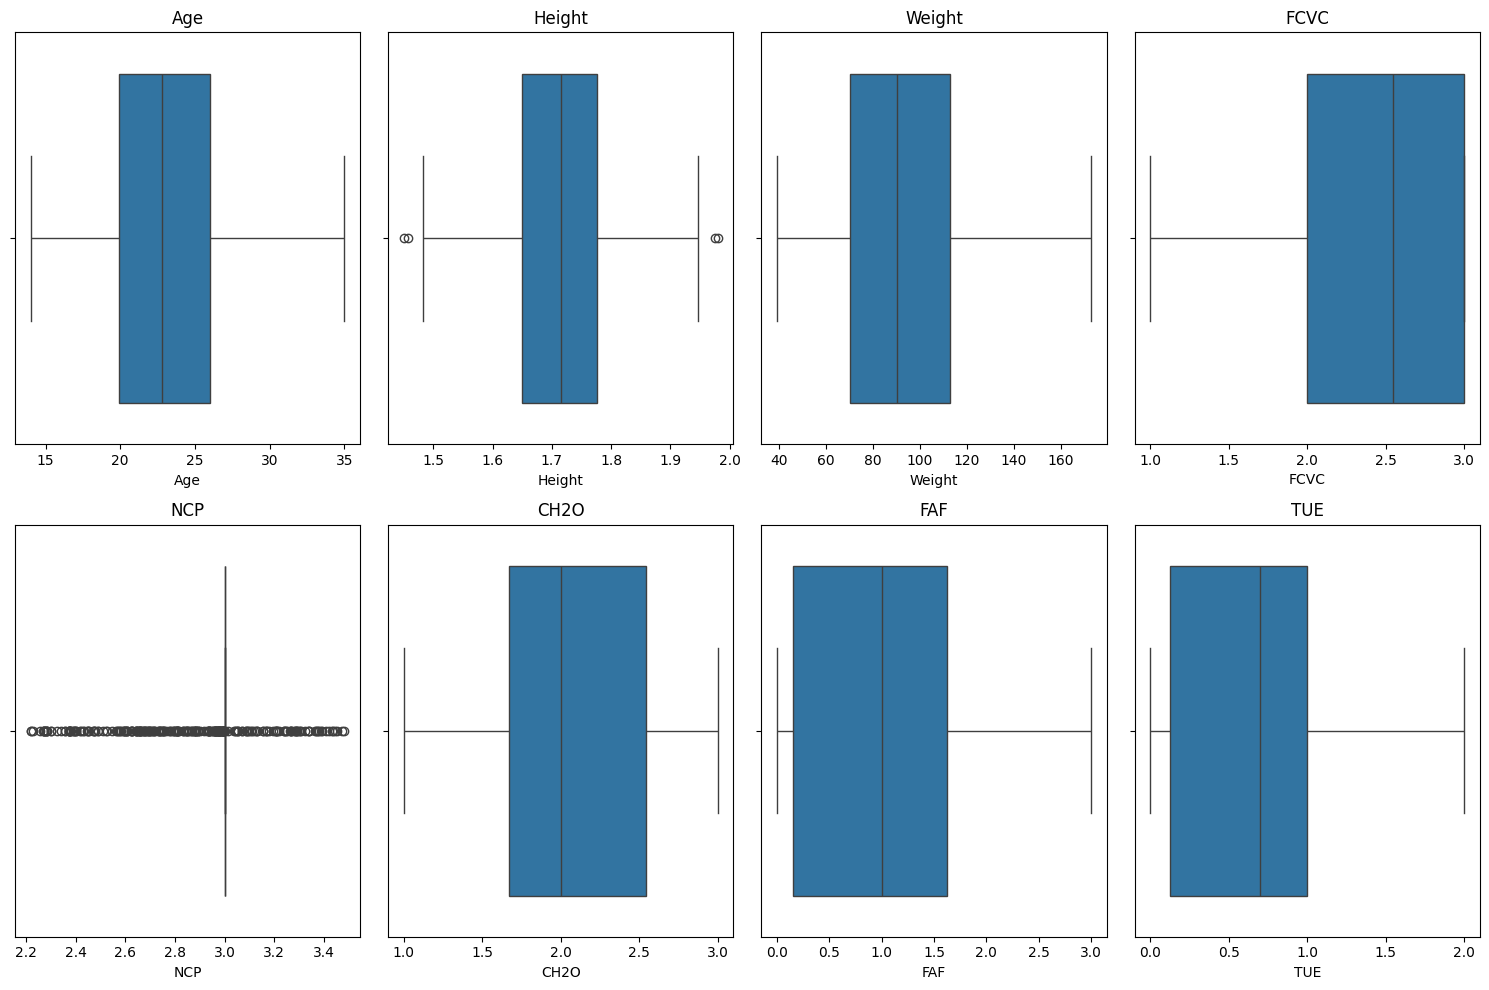

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um boxplot para cada vari√°vel num√©rica
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# An√°lise P√≥s-Tratamento dos Outliers üìä





Ap√≥s o tratamento dos outliers, o gr√°fico mostra que as altera√ß√µes foram aplicadas com sucesso em v√°rias vari√°veis. Vamos revisar o que mudou e o que ainda precisa ser analisado:

## 1. Age (Idade)
- ‚úÖ **Observa√ß√£o**: Agora, a vari√°vel est√° sem outliers. A faixa de idade est√° concentrada entre 15 e 35 anos.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria, o tratamento foi eficaz.

## 2. Height (Altura)
- ‚ö†Ô∏è **Observa√ß√£o**: H√° um pequeno outlier para pessoas com altura pr√≥xima de 2 metros.
- **A√ß√£o**: Esse outlier pode ser mantido, pois n√£o √© extremo, e pode ser relevante dependendo do objetivo da an√°lise.

## 3. Weight (Peso)
- ‚úÖ **Observa√ß√£o**: O outlier identificado anteriormente foi removido. A distribui√ß√£o de peso agora est√° concentrada entre 40kg e 160kg.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria, o tratamento foi eficaz.

## 4. FCVC (Consumo de Vegetais)
- ‚úÖ **Observa√ß√£o**: N√£o h√° outliers para essa vari√°vel, o que est√° correto.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria.

## 5. NCP (N√∫mero de Refei√ß√µes por Dia)
- ‚ö†Ô∏è **Observa√ß√£o**: Ainda existem muitos outliers no intervalo de 2 a 3 refei√ß√µes por dia.
- **A√ß√£o**: Esses outliers podem refletir h√°bitos alimentares relevantes no estudo da obesidade. Talvez seja interessante mant√™-los, dependendo do foco do projeto.

## 6. CH2O (Consumo de √Ågua)
- ‚úÖ **Observa√ß√£o**: N√£o h√° outliers, e a distribui√ß√£o est√° equilibrada.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria.

## 7. FAF (Atividade F√≠sica)
- ‚úÖ **Observa√ß√£o**: N√£o h√° outliers e a vari√°vel apresenta uma distribui√ß√£o equilibrada.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria.

## 8. TUE (Uso de Tecnologia)
- ‚úÖ **Observa√ß√£o**: A vari√°vel continua sem outliers, com uma varia√ß√£o regular de uso de tecnologia.
- **A√ß√£o**: Nenhuma a√ß√£o necess√°ria.

---

# Conclus√£o Geral üìà

- O tratamento de outliers foi bem-sucedido nas vari√°veis mais cr√≠ticas, como **Age** e **Weight**.  
- Para a vari√°vel **NCP**, embora existam muitos outliers, esses dados podem ser √∫teis, j√° que refletem a realidade de h√°bitos alimentares irregulares, comuns em estudos de obesidade.  
- As vari√°veis **Height** e **CH2O** est√£o praticamente sem outliers significativos, e os poucos existentes podem ser mantidos se forem relevantes para o estudo.

## Verifica√ß√£o de Valores Duplicados üîç

In [ ]:
# Verificar e remover valores duplicados
data = data.drop_duplicates()


## Escalonamento das Vari√°veis Num√©ricas üìè

O escalonamento das vari√°veis num√©ricas √© um passo importante, especialmente se usar algoritmos que s√£o sens√≠veis √† magnitude das vari√°veis, como SVM, K-NN, Redes Neurais, entre outros.

Foi feito a normaliza√ß√£o (ou padroniza√ß√£o) das vari√°veis num√©ricas:

a. Normaliza√ß√£o (Min-Max Scaler)
normalizar os dados para um intervalo entre 0 e 1:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Definir as colunas num√©ricas
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Aplicar Min-Max Scaler
scaler = MinMaxScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Verificar os dados normalizados
data.head()


<ipython-input-27-5d8ff822ee3d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = scaler.fit_transform(data[num_cols])


Gender       Age    Height    Weight  family_history_with_overweight  FAVC  \
0       0  0.333333  0.320755  0.186567                               1     0   
1       0  0.333333  0.132075  0.126866                               1     0   
2       1  0.428571  0.660377  0.283582                               1     0   
3       1  0.619048  0.660377  0.358209                               0     0   
5       1  0.714286  0.320755  0.104478                               0     1   

   FCVC       NCP       CAEC  SMOKE  CH2O  SCC       FAF  TUE        CALC  \
0   0.5  0.618068  Sometimes      0   0.5   no  0.000000  0.5          no   
1   1.0  0.618068  Sometimes      1   1.0  yes  1.000000  0.0   Sometimes   
2   0.5  0.618068  Sometimes      0   0.5   no  0.666667  0.5  Frequently   
3   1.0  0.618068  Sometimes      0   0.5   no  0.666667  0.0  Frequently   
5   0.5  0.618068  Sometimes      0   0.5   no  0.000000  0.0   Sometimes   

                  MTRANS          NObeyesdad  
0  Public_Transportation       Normal_Weight  
1  Public_Transportation       Normal_Weight  
2  Public_Transportation       Normal_Weight  
3                Walking  Overweight_Level_I  
5             Automobile       Normal_Weight

##  Verifica√ß√£o Final dos Dados üîç

In [ ]:
# Verificar se todas as vari√°veis est√£o no formato correto e se h√° alguma anomalia
data.info()

# Verificar um resumo estat√≠stico para as vari√°veis num√©ricas
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1395 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1395 non-null   int64  
 1   Age                             1395 non-null   float64
 2   Height                          1395 non-null   float64
 3   Weight                          1395 non-null   float64
 4   family_history_with_overweight  1395 non-null   int64  
 5   FAVC                            1395 non-null   int64  
 6   FCVC                            1395 non-null   float64
 7   NCP                             1395 non-null   float64
 8   CAEC                            1395 non-null   object 
 9   SMOKE                           1395 non-null   int64  
 10  CH2O                            1395 non-null   float64
 11  SCC                             1395 non-null   object 
 12  FAF                             1395 no

Gender          Age       Height       Weight  \
count  1395.000000  1395.000000  1395.000000  1395.000000   
mean      0.518280     0.436467     0.499791     0.395807   
std       0.499845     0.198549     0.165441     0.204928   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.282807     0.377358     0.231343   
50%       1.000000     0.417696     0.501547     0.385611   
75%       1.000000     0.570677     0.614349     0.551324   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     1395.000000  1395.000000  1395.000000  1395.000000   
mean                         0.849462     0.886738     0.726966     0.592653   
std                          0.357726     0.317026     0.275084     0.121030   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.000000     1.000000     0.500000     0.618068   
50%                          1.000000     1.000000     0.777700     0.618068   
75%                          1.000000     1.000000     1.000000     0.618068   
max                          1.000000     1.000000     1.000000     1.000000   

             SMOKE         CH2O          FAF          TUE  
count  1395.000000  1395.000000  1395.000000  1395.000000  
mean      0.020789     0.524451     0.343260     0.350146  
std       0.142727     0.302860     0.282338     0.291921  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.337448     0.051382     0.063170  
50%       0.000000     0.500000     0.333333     0.346304  
75%       0.000000     0.773365     0.541119     0.500000  
max       1.000000     1.000000     1.000000     1.000000

Convers√£o de Vari√°veis Categ√≥ricas Restantes üîÑ

In [ ]:
# Converter vari√°veis categ√≥ricas restantes em vari√°veis num√©ricas
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['SCC'] = label_encoder.fit_transform(data['SCC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Verificar a nova estrutura do dataset
data.dtypes


Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
dtype: object

In [ ]:
# Estat√≠sticas descritivas das vari√°veis num√©ricas
data.describe()


Gender          Age       Height       Weight  \
count  1395.000000  1395.000000  1395.000000  1395.000000   
mean      0.518280     0.436467     0.499791     0.395807   
std       0.499845     0.198549     0.165441     0.204928   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.282807     0.377358     0.231343   
50%       1.000000     0.417696     0.501547     0.385611   
75%       1.000000     0.570677     0.614349     0.551324   
max       1.000000     1.000000     1.000000     1.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     1395.000000  1395.000000  1395.000000  1395.000000   
mean                         0.849462     0.886738     0.726966     0.592653   
std                          0.357726     0.317026     0.275084     0.121030   
min                          0.000000     0.000000     0.000000     0.000000   
25%                          1.000000     1.000000     0.500000     0.618068   
50%                          1.000000     1.000000     0.777700     0.618068   
75%                          1.000000     1.000000     1.000000     0.618068   
max                          1.000000     1.000000     1.000000     1.000000   

              CAEC        SMOKE         CH2O          SCC          FAF  \
count  1395.000000  1395.000000  1395.000000  1395.000000  1395.000000   
mean      1.869534     0.020789     0.524451     0.048029     0.343260   
std       0.427074     0.142727     0.302860     0.213904     0.282338   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     0.000000     0.337448     0.000000     0.051382   
50%       2.000000     0.000000     0.500000     0.000000     0.333333   
75%       2.000000     0.000000     0.773365     0.000000     0.541119   
max       3.000000     1.000000     1.000000     1.000000     1.000000   

               TUE         CALC       MTRANS   NObeyesdad  
count  1395.000000  1395.000000  1395.000000  1395.000000  
mean      0.350146     1.205018     2.570609     3.084588  
std       0.291921     0.475637     1.092493     1.838146  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.063170     1.000000     3.000000     2.000000  
50%       0.346304     1.000000     3.000000     3.000000  
75%       0.500000     1.000000     3.000000     4.000000  
max       1.000000     2.000000     4.000000     6.000000

# An√°lise dos Dados Escalonados üìä



## Gender:
- **Mean (M√©dia)**: 0.518 - A propor√ß√£o entre homens e mulheres est√° equilibrada (0 representa "Female" e 1 representa "Male").
- **Distribui√ß√£o**: Como essa vari√°vel foi binarizada (0 ou 1), n√£o h√° necessidade de escalonamento adicional.

## Age:
- **Mean**: 0.436 - A idade est√° normalizada entre 0 e 1, o que mostra uma boa distribui√ß√£o no dataset.
- **Std (Desvio Padr√£o)**: 0.198 - Mostra uma varia√ß√£o moderada entre os indiv√≠duos.
- **Distribui√ß√£o**: Como a idade foi normalizada, tudo est√° correto para a modelagem.

## Height e Weight:
- **Mean para altura**: 0.499 - Altura foi escalonada corretamente entre 0 e 1.
- **Mean para peso**: 0.395 - Peso tamb√©m foi escalonado corretamente.
- **Distribui√ß√£o**: Essas vari√°veis foram escalonadas de forma adequada com o Min-Max Scaler.

## family_history_with_overweight e FAVC:
- **Mean**: 0.849 e 0.886 - A maioria dos indiv√≠duos tem hist√≥rico familiar de sobrepeso e consome frequentemente alimentos hipercal√≥ricos.
- **Distribui√ß√£o**: Vari√°veis categ√≥ricas com valores de 0 e 1, que est√£o corretamente codificadas.

## FCVC (Consumo de Vegetais), NCP (N√∫mero de Refei√ß√µes), CH2O (Consumo de √Ågua), FAF (Atividade F√≠sica), TUE (Uso de Tecnologia):
- Todas as vari√°veis foram normalizadas, com m√©dias variando entre 0.343 a 0.726, o que indica uma distribui√ß√£o adequada para estas vari√°veis num√©ricas.
- **Distribui√ß√£o**: N√£o h√° necessidade de ajustes adicionais aqui.

## CAEC (Consumo de Alimentos entre as Refei√ß√µes), CALC (Consumo de √Ålcool), MTRANS (Meio de Transporte):
- **CAEC (Mean 1.869)** e **CALC (Mean 1.205)** t√™m valores medianos normais, j√° que s√£o vari√°veis categ√≥ricas codificadas.
- **MTRANS** tamb√©m foi adequadamente codificada para modelagem.

## NObeyesdad (Estado de Obesidade):
- A vari√°vel alvo foi corretamente convertida, com valores codificados que variam de 0 a 6, representando as diferentes classes de obesidade.


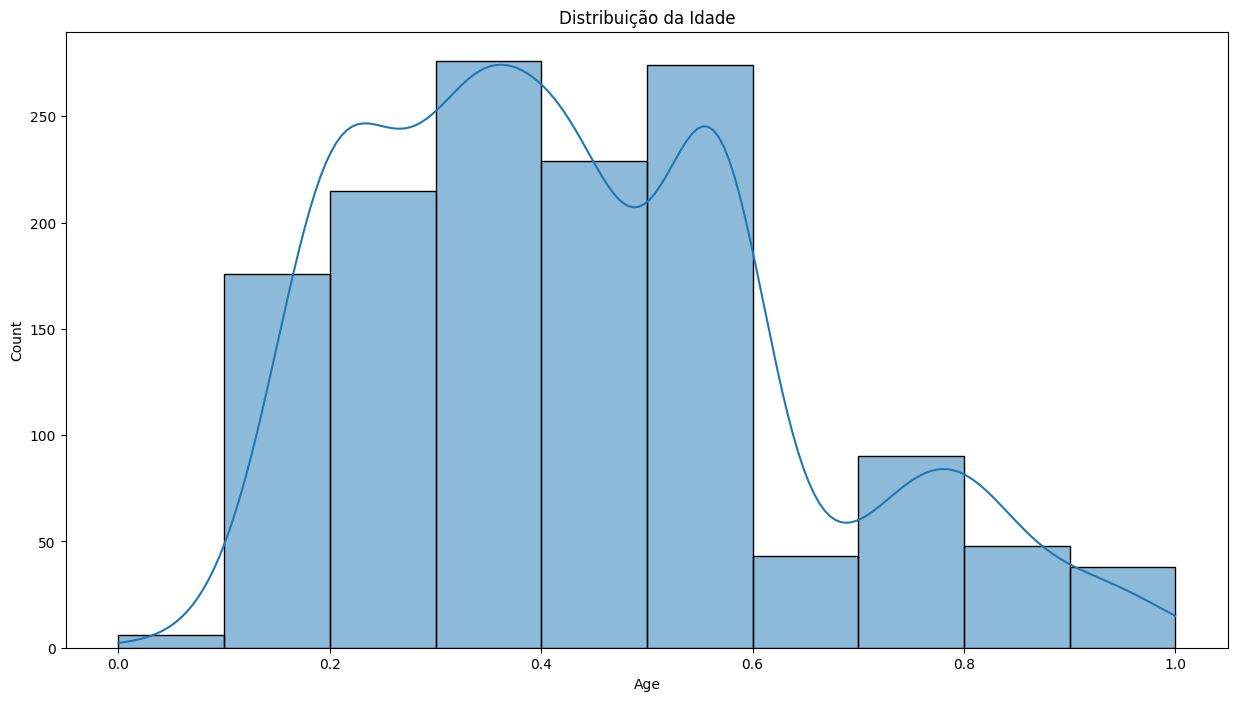

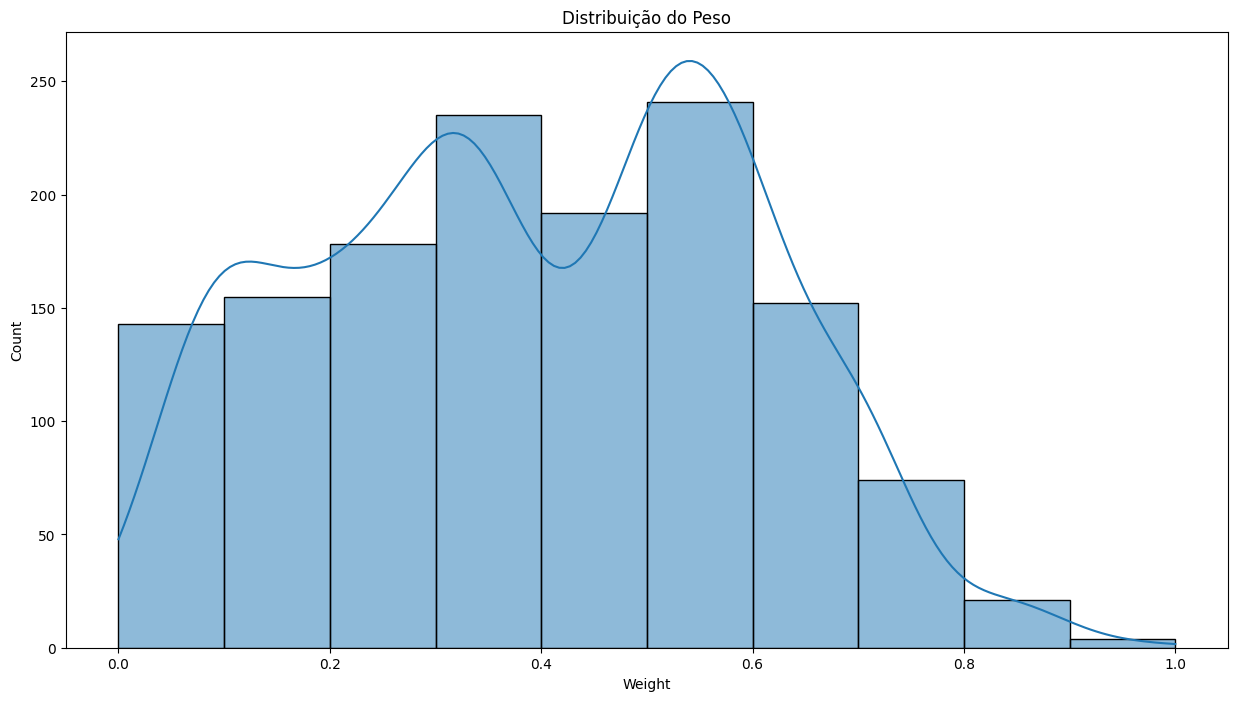

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar as distribui√ß√µes das vari√°veis principais
plt.figure(figsize=(15, 8))
sns.histplot(data['Age'], kde=True, bins=10)
plt.title('Distribui√ß√£o da Idade')
plt.show()

plt.figure(figsize=(15, 8))
sns.histplot(data['Weight'], kde=True, bins=10)
plt.title('Distribui√ß√£o do Peso')
plt.show()


## Verificando Balanceamento

Saving dataset_tratado.csv to dataset_tratado (2).csv


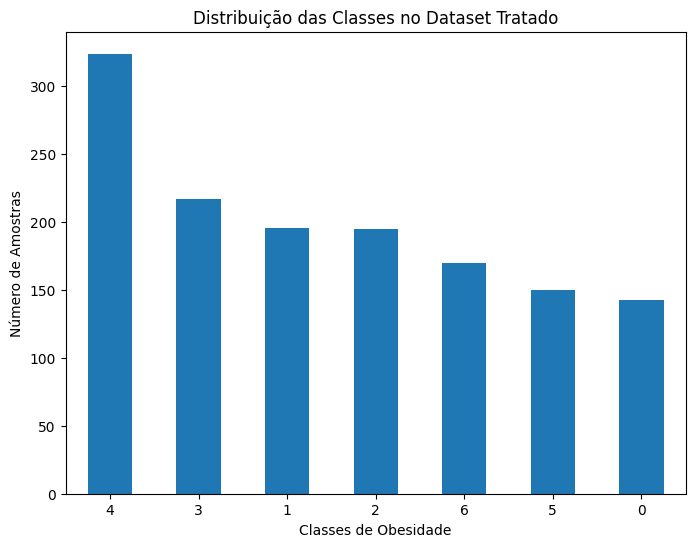

NObeyesdad
4    324
3    217
1    196
2    195
6    170
5    150
0    143
Name: count, dtype: int64


In [ ]:
# Importar bibliotecas necess√°rias
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Contar a distribui√ß√£o das classes
class_counts = data['NObeyesdad'].value_counts()

# Plotar a distribui√ß√£o das classes
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar')
plt.title('Distribui√ß√£o das Classes no Dataset Tratado')
plt.xlabel('Classes de Obesidade')
plt.ylabel('N√∫mero de Amostras')
plt.xticks(rotation=0)
plt.show()

# Exibir as contagens
print(class_counts)


In [ ]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribui√ß√£o de classes
from collections import Counter
print(f"Distribui√ß√£o de classes ap√≥s SMOTE: {Counter(y_resampled)}")


Distribui√ß√£o de classes ap√≥s SMOTE: Counter({1: 324, 5: 324, 2: 324, 6: 324, 3: 324, 0: 324, 4: 324})


In [ ]:
# Instalar imblearn no Colab
!pip install imblearn

# Importar bibliotecas necess√°rias
from imblearn.over_sampling import SMOTE
import pandas as pd
from google.colab import files

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Separar as vari√°veis preditivas (X) e a vari√°vel-alvo (y)
X = data.drop(columns=['NObeyesdad'])  # Vari√°veis preditivas
y = data['NObeyesdad']                 # Vari√°vel-alvo

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Criar um novo DataFrame balanceado com as vari√°veis preditivas e alvo
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['NObeyesdad'] = y_resampled

# Salvar o dataset balanceado como CSV
data_resampled.to_csv('dataset_balanceado.csv', index=False)

# Fazer o download do arquivo CSV no Colab
files.download('dataset_balanceado.csv')


Saving dataset_tratado.csv to dataset_tratado (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Divis√£o entre Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

# Separar as vari√°veis preditoras (X) e a vari√°vel alvo (y)
X = data.drop(columns=['NObeyesdad'])  # 'NObeyesdad' √© a vari√°vel alvo
y = data['NObeyesdad']

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos datasets
print(f"Tamanho do treino: {X_train.shape}")
print(f"Tamanho do teste: {X_test.shape}")


Tamanho do treino: (976, 16)
Tamanho do teste: (419, 16)


In [ ]:
# Salvar o dataset tratado como CSV
data.to_csv('dataset_tratado.csv', index=False)

# Se estiver no Google Colab, voc√™ pode baixar diretamente:
from google.colab import files
files.download('dataset_tratado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Salvar o dataset tratado como pickle
data.to_pickle('dataset_tratado.pkl')

# Se estiver no Google Colab, voc√™ pode baixar diretamente:
from google.colab import files
files.download('dataset_tratado.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## PCA

In [ ]:
# Verificar a vari√¢ncia explicada pelos componentes principais
print(pca.explained_variance_ratio_)


[0.47979261 0.10341276 0.09937941 0.06872658]


In [ ]:
# Ajustar o PCA para capturar mais vari√¢ncia
pca = PCA(n_components=0.95)  # Capturar 95% da vari√¢ncia
X_train_pca = pca.fit_transform(X_train)


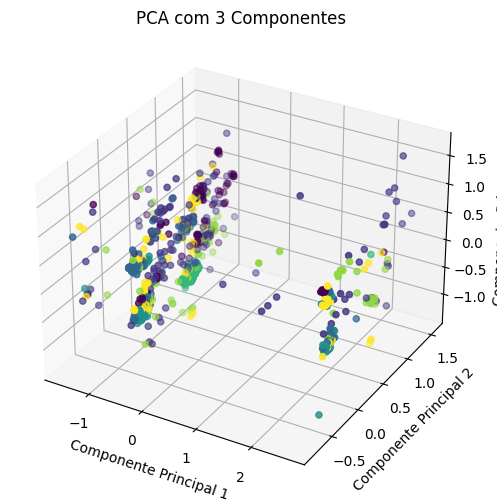

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.title('PCA com 3 Componentes')
plt.show()


In [ ]:
!pip install imblearn


In [ ]:
# Importar bibliotecas necess√°rias
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Fazer o upload do arquivo CSV tratado
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
data = pd.read_csv(list(uploaded.keys())[0])

# Separar as vari√°veis preditivas (X) e a vari√°vel-alvo (y)
X = data.drop(columns=['NObeyesdad'])  # Vari√°veis preditivas
y = data['NObeyesdad']                 # Vari√°vel-alvo

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir os dados balanceados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Inicializar os classificadores
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Avaliar cada classificador
for name, clf in classifiers.items():
    # Treinar o classificador
    clf.fit(X_train, y_train)

    # Fazer previs√µes no conjunto de teste
    y_pred = clf.predict(X_test)

    # Avaliar o desempenho
    print(f"Classificador: {name}")
    print(f"Acur√°cia: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Saving dataset_balanceado.csv to dataset_balanceado (1).csv
Classificador: Random Forest
Acur√°cia: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       1.00      0.95      0.98        65
           6       0.98      0.98      0.98        64

    accuracy                           0.98       454
   macro avg       0.99      0.99      0.98       454
weighted avg       0.99      0.98      0.98       454

--------------------------------------------------
Classificador: SVM
Acur√°cia: 0.7467
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        73
           1       0.61      0.48      0.54        64
           2       0.68      0.62      0.65  

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:52:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classificador: XGBoost
Acur√°cia: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.95      0.97      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       0.97      0.97      0.97        65
           6       0.97      1.00      0.98        64

    accuracy                           0.98       454
   macro avg       0.98      0.99      0.98       454
weighted avg       0.98      0.98      0.98       454

--------------------------------------------------


##  Ajuste de Hiperpar√¢metros (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Ajustar o modelo com os melhores hiperpar√¢metros
grid_search.fit(X_train, y_train)
print("Melhores hiperpar√¢metros:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Melhores hiperpar√¢metros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Valida√ß√£o Cruzada (Cross-Validation)

valida√ß√£o cruzada para garantir que o modelo n√£o esteja superestimando seu desempenho devido √† divis√£o treino/teste.

In [ ]:
from sklearn.model_selection import cross_val_score

# Avaliar o Random Forest com valida√ß√£o cruzada
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X_resampled, y_resampled, cv=5)
print(f"Acur√°cia m√©dia com valida√ß√£o cruzada: {cv_scores.mean():.4f}")


Acur√°cia m√©dia com valida√ß√£o cruzada: 0.9744


## An√°lise de Feature Importance

ara entender melhor quais vari√°veis mais influenciam as predi√ß√µes dos modelos, foi realizado uma an√°lise de import√¢ncia das features. Isso √© particularmente √∫til no Random Forest e XGBoost.

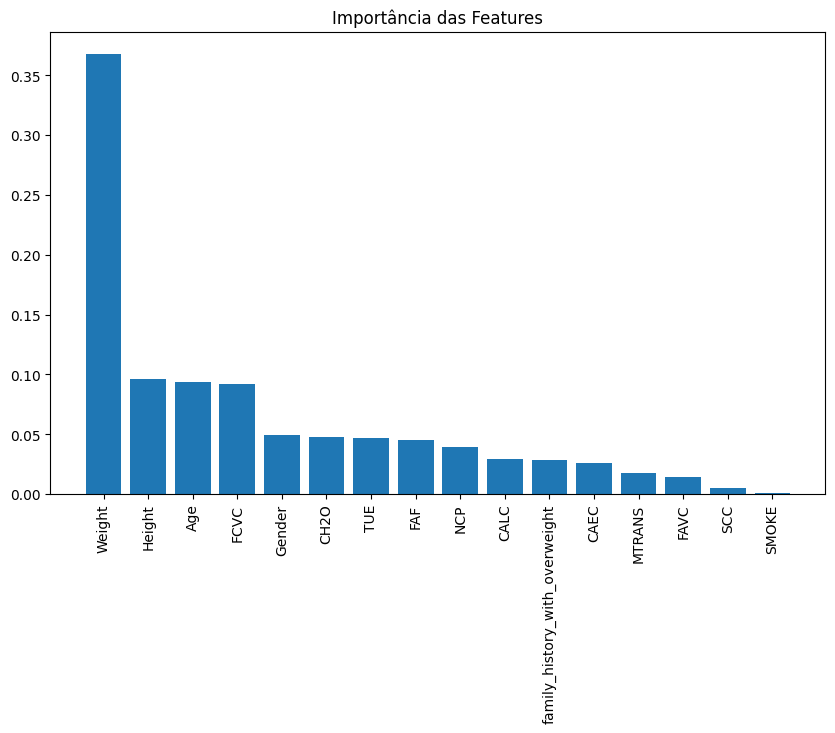

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Import√¢ncia das features
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotar as 10 principais features
plt.figure(figsize=(10,6))
plt.title("Import√¢ncia das Features")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()


# Treinamento Final do Modelo com Hiperpar√¢metros Otimizados

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib  # Para salvar o modelo treinado

# Treinar o modelo Random Forest com os melhores hiperpar√¢metros
final_rf_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Treinar o modelo com os dados balanceados
final_rf_model.fit(X_train, y_train)

# Fazer previs√µes no conjunto de teste
y_pred = final_rf_model.predict(X_test)

# Avaliar o desempenho
accuracy = accuracy_score(y_test, y_pred)
print(f"Acur√°cia Final do Modelo: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Salvar o modelo treinado
joblib.dump(final_rf_model, 'random_forest_model_otimizado.pkl')


Acur√°cia Final do Modelo: 0.9846
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        73
           1       0.91      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        67
           5       1.00      0.95      0.98        65
           6       0.98      0.98      0.98        64

    accuracy                           0.98       454
   macro avg       0.99      0.99      0.98       454
weighted avg       0.99      0.98      0.98       454



['random_forest_model_otimizado.pkl']

In [ ]:
# Salvar o dataset balanceado como CSV
data_resampled.to_csv('dataset_balanceado_final.csv', index=False)

# Fazer o download do arquivo CSV no Colab
files.download('dataset_balanceado_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Fazer o download do modelo treinado
files.download('random_forest_model_otimizado.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Implementa√ß√£o em Produ√ß√£o (Simula√ß√£o)

Agora que o modelo est√° otimizado e salvo, podemos simular a implementa√ß√£o em produ√ß√£o, onde ele pode ser usado para fazer previs√µes em novos dados.

## Carregar o Modelo Treinado para Fazer Novas Previs√µes:

In [ ]:
# Simular um novo conjunto de dados (exemplo fict√≠cio) com nomes das features
novos_dados = pd.DataFrame([[0.7, 0.5, 0.8, 1, 2, 0.5, 2, 1, 0.5, 0, 1, 3, 1, 1, 1, 0]],
                            columns=X.columns)

# Fazer previs√µes com o modelo carregado
novas_predicoes = rf_loaded_model.predict(novos_dados)
print("Nova previs√£o de obesidade:", novas_predicoes)


Nova previs√£o de obesidade: [3]


# Agrupamento

Saving dataset_tratado.csv to dataset_tratado.csv


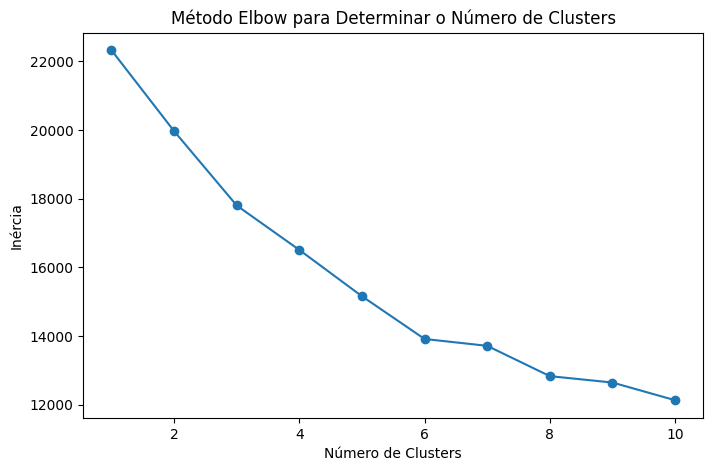

           Gender       Age    Height    Weight  \
Cluster                                           
0        0.984816  0.417963  0.605995  0.427529   
1        0.000000  0.442849  0.445754  0.582608   
2        0.269481  0.308687  0.384400  0.171522   
3        0.822222  0.701175  0.559630  0.401487   
4        0.758621  0.612081  0.610612  0.457308   
5        0.250000  0.325424  0.369649  0.172523   

         family_history_with_overweight      FAVC      FCVC       NCP  \
Cluster                                                                 
0                              0.984816  0.943601  0.597827  0.560529   
1                              1.000000  1.000000  0.973066  0.617000   
2                              0.522727  0.740260  0.651432  0.620221   
3                              0.927778  0.911111  0.665558  0.588164   
4                              0.862069  0.827586  0.736949  0.618068   
5                              0.390625  0.515625  0.831457  0.558180   

      

In [ ]:
# Importar bibliotecas necess√°rias
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fazer o upload do arquivo CSV
uploaded = files.upload()

# Carregar o dataset tratado no pandas DataFrame
# Aqui voc√™ pode escolher o arquivo que deseja: tratado ou balanceado
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar as vari√°veis num√©ricas para o agrupamento
X = data.drop(columns=['NObeyesdad'])  # Remover a vari√°vel-alvo (se presente)

# Padronizar os dados num√©ricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar o n√∫mero ideal de clusters usando o m√©todo Elbow
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gr√°fico para encontrar o "cotovelo"
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('M√©todo Elbow para Determinar o N√∫mero de Clusters')
plt.xlabel('N√∫mero de Clusters')
plt.ylabel('In√©rcia')
plt.show()

# Aplicar K-Means com o n√∫mero de clusters desejado
optimal_k = 6  # Exemplo: escolha o valor de k baseado no gr√°fico do cotovelo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Analisar os clusters formados
print(data.groupby('Cluster').mean())


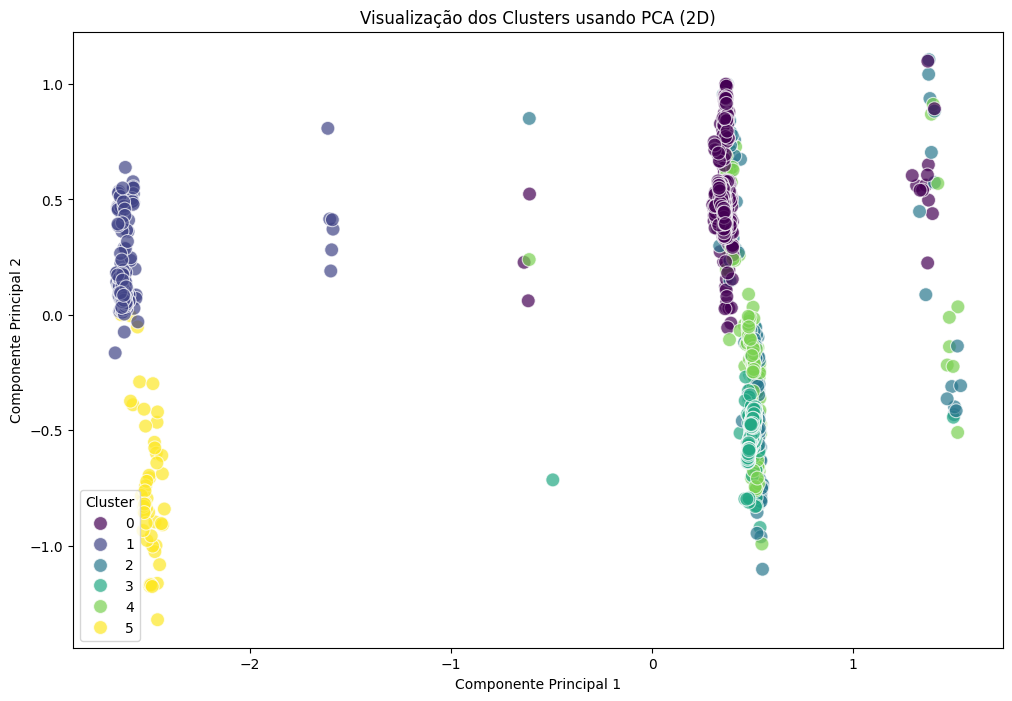

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Carregar o dataset tratado
dataset_name = list(uploaded.keys())[0]
data_resampled = pd.read_csv(dataset_name)

# Verificar se a coluna 'Cluster' n√£o est√° presente e, se n√£o, realizar o agrupamento
if 'Cluster' not in data_resampled.columns:
    # Definir o n√∫mero de clusters com base no m√©todo Elbow (por exemplo, 4)
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o K-means ao dataset (sem a vari√°vel alvo 'NObeyesdad', se estiver presente)
    if 'NObeyesdad' in data_resampled.columns:
        features = data_resampled.drop(columns=['NObeyesdad'])
    else:
        features = data_resampled

    # Aplicar o K-means
    data_resampled['Cluster'] = kmeans.fit_predict(features)

# Utilizar PCA para reduzir a dimensionalidade dos dados para 2 componentes principais para visualiza√ß√£o
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features)

# Criar um DataFrame com as componentes principais e os clusters
pca_df = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])
pca_df['Cluster'] = data_resampled['Cluster']

# Visualizar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='Componente 1', y='Componente 2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Visualiza√ß√£o dos Clusters usando PCA (2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()


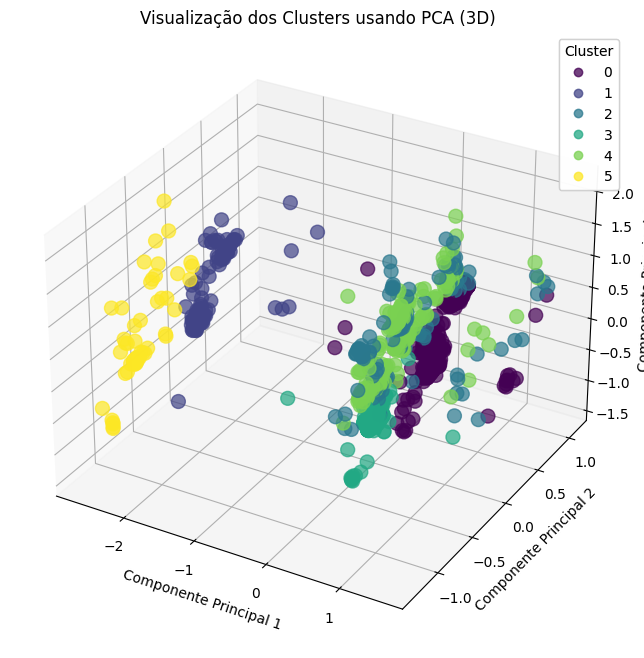

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Necess√°rio para a visualiza√ß√£o 3D

# Carregar o dataset tratado
dataset_name = list(uploaded.keys())[0]
data_resampled = pd.read_csv(dataset_name)

# Verificar se a coluna 'Cluster' n√£o est√° presente e, se n√£o, realizar o agrupamento
if 'Cluster' not in data_resampled.columns:
    # Definir o n√∫mero de clusters com base no m√©todo Elbow (por exemplo, 6)
    n_clusters = 6
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Ajustar o K-means ao dataset (sem a vari√°vel alvo 'NObeyesdad', se estiver presente)
    if 'NObeyesdad' in data_resampled.columns:
        features = data_resampled.drop(columns=['NObeyesdad'])
    else:
        features = data_resampled

    # Aplicar o K-means
    data_resampled['Cluster'] = kmeans.fit_predict(features)

# Utilizar PCA para reduzir a dimensionalidade dos dados para 3 componentes principais para visualiza√ß√£o 3D
pca = PCA(n_components=3)
data_pca = pca.fit_transform(features)

# Criar um DataFrame com as componentes principais e os clusters
pca_df = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2', 'Componente 3'])
pca_df['Cluster'] = data_resampled['Cluster']

# Visualizar os clusters em 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotar os clusters em 3D
scatter = ax.scatter(pca_df['Componente 1'], pca_df['Componente 2'], pca_df['Componente 3'],
                     c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7)

# Adicionar r√≥tulos e t√≠tulo
ax.set_title('Visualiza√ß√£o dos Clusters usando PCA (3D)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Adicionar legenda
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

# Mostrar o gr√°fico
plt.show()


# Compara√ß√£o com outros algortimos

In [ ]:
!pip install scikeras[tensorflow]


In [ ]:
# Importa√ß√µes necess√°rias
import pandas as pd
import numpy as np
from google.colab import files
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import tensorflow as tf

# Carregar o dataset
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar vari√°veis preditoras e alvo
X = data.drop(columns=['NObeyesdad']) if 'NObeyesdad' in data.columns else data.iloc[:, :-1]  # Assumindo a √∫ltima coluna como alvo, caso n√£o tenha o nome 'NObeyesdad'
y = data['NObeyesdad'] if 'NObeyesdad' in data.columns else data.iloc[:, -1]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pasta para salvar os modelos
os.makedirs("modelos_treinados", exist_ok=True)

# Fun√ß√£o para criar uma rede neural simples para classifica√ß√£o
def create_neural_network():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(len(y.unique()), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Lista de modelos a serem avaliados
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "MLP (Rede Neural Cl√°ssica)": MLPClassifier(max_iter=300, random_state=42),
    "Keras Neural Network": KerasClassifier(model=create_neural_network, epochs=50, batch_size=10, verbose=0),
}

# Modelos ensemble complexos
stacking = StackingClassifier(
    estimators=[('rf', RandomForestClassifier(random_state=42)),
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('svc', SVC(probability=True, random_state=42))],
    final_estimator=LogisticRegression()
)

voting = VotingClassifier(
    estimators=[('rf', RandomForestClassifier(random_state=42)),
                ('gb', GradientBoostingClassifier(random_state=42)),
                ('knn', KNeighborsClassifier())],
    voting='soft'
)

modelos["Stacking"] = stacking
modelos["Voting"] = voting

# Dicion√°rio para armazenar as m√©tricas
metricas = {}

# Treinamento, avalia√ß√£o e salvamento dos modelos
for nome, modelo in modelos.items():
    print(f"Treinando o modelo: {nome}")

    # Treinamento
    if nome == "Keras Neural Network":
        modelo.fit(X_train, y_train)
    else:
        modelo.fit(X_train, y_train)

    # Previs√µes e m√©tricas
    y_pred = modelo.predict(X_test)
    if nome == "Keras Neural Network" and y_pred.ndim == 2:
        y_pred = np.argmax(y_pred, axis=1)  # Para redes neurais em Keras, precisa converter para classes

    # Calculando as m√©tricas
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precisao = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Salvando as m√©tricas
    metricas[nome] = {
        "Acur√°cia": acuracia,
        "F1 Score": f1,
        "Precis√£o": precisao,
        "Recall": recall
    }

    # Salvando o modelo
    caminho_modelo = f"modelos_treinados/{nome}.pkl"
    if nome != "Keras Neural Network":
        joblib.dump(modelo, caminho_modelo)
    else:
        modelo.model_.save(caminho_modelo.replace(".pkl", ".h5"))  # Para redes neurais Keras, salva como .h5
    print(f"Modelo {nome} salvo em {caminho_modelo}")

# Criar DataFrame com as m√©tricas para facilitar a visualiza√ß√£o
metricas_df = pd.DataFrame(metricas).T
print("\nM√©tricas de avalia√ß√£o dos modelos:")
print(metricas_df)

# Exportar o DataFrame de m√©tricas para download
metricas_df.to_csv("modelos_treinados/metricas_modelos.csv")

# Realizar o download dos modelos salvos (Google Colab)
files.download("modelos_treinados/metricas_modelos.csv")

for model_name in modelos:
    model_path = f"modelos_treinados/{model_name}.pkl"
    if model_name == "Keras Neural Network":
        model_path = model_path.replace(".pkl", ".h5")
    files.download(model_path)


Saving dataset_balanceado_final.csv to dataset_balanceado_final (1).csv
Treinando o modelo: Logistic Regression
Modelo Logistic Regression salvo em modelos_treinados/Logistic Regression.pkl
Treinando o modelo: Decision Tree
Modelo Decision Tree salvo em modelos_treinados/Decision Tree.pkl
Treinando o modelo: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Modelo Random Forest salvo em modelos_treinados/Random Forest.pkl
Treinando o modelo: Gradient Boosting
Modelo Gradient Boosting salvo em modelos_treinados/Gradient Boosting.pkl
Treinando o modelo: AdaBoost


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Modelo AdaBoost salvo em modelos_treinados/AdaBoost.pkl
Treinando o modelo: Bagging
Modelo Bagging salvo em modelos_treinados/Bagging.pkl
Treinando o modelo: K-Nearest Neighbors
Modelo K-Nearest Neighbors salvo em modelos_treinados/K-Nearest Neighbors.pkl
Treinando o modelo: SVM
Modelo SVM salvo em modelos_treinados/SVM.pkl
Treinando o modelo: XGBoost


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Modelo XGBoost salvo em modelos_treinados/XGBoost.pkl
Treinando o modelo: MLP (Rede Neural Cl√°ssica)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Modelo MLP (Rede Neural Cl√°ssica) salvo em modelos_treinados/MLP (Rede Neural Cl√°ssica).pkl
Treinando o modelo: Keras Neural Network


Modelo Keras Neural Network salvo em modelos_treinados/Keras Neural Network.pkl
Treinando o modelo: Stacking
Modelo Stacking salvo em modelos_treinados/Stacking.pkl
Treinando o modelo: Voting
Modelo Voting salvo em modelos_treinados/Voting.pkl

M√©tricas de avalia√ß√£o dos modelos:
                            Acur√°cia  F1 Score  Precis√£o    Recall
Logistic Regression         0.722467  0.709163  0.707158  0.722467
Decision Tree               0.942731  0.942511  0.942694  0.942731
Random Forest               0.972100  0.972413  0.974552  0.972100
Gradient Boosting           0.972100  0.972220  0.972632  0.972100
AdaBoost                    0.302496  0.181537  0.130590  0.302496
Bagging                     0.966226  0.966026  0.966224  0.966226
K-Nearest Neighbors         0.838473  0.835362  0.836316  0.838473
SVM                         0.740088  0.729393  0.729702  0.740088
XGBoost                     0.977974  0.978027  0.978264  0.977974
MLP (Rede Neural Cl√°ssica)  0.925110  0.9247

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Importar as bibliotecas necess√°rias
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf

# Fun√ß√£o para converter entrada categ√≥rica para num√©rica conforme o mapeamento dos dados de treinamento
def preprocess_input(data):
    mapping = {
        'Gender': {'Male': 1, 'Female': 0},
        'family_history_with_overweight': {'yes': 1, 'no': 0},
        'FAVC': {'yes': 1, 'no': 0},
        'SMOKE': {'yes': 1, 'no': 0},
        'SCC': {'yes': 1, 'no': 0},
        'CAEC': {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0},
        'CALC': {'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'no': 0},
        'MTRANS': {'Public_Transportation': 2, 'Automobile': 0, 'Walking': 4, 'Motorbike': 3, 'Bike': 1}
    }
    for col, map_dict in mapping.items():
        data[col] = data[col].map(map_dict)
    return data

# Dados dos pacientes (exemplo variado)
patients = [
    {'Gender': 'Male', 'Age': 25, 'Height': 1.80, 'Weight': 85, 'family_history_with_overweight': 'yes', 'FAVC': 'no',
     'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 2, 'TUE': 1, 'CALC': 'Sometimes', 'MTRANS': 'Public_Transportation'},

    {'Gender': 'Female', 'Age': 30, 'Height': 1.65, 'Weight': 70, 'family_history_with_overweight': 'no', 'FAVC': 'yes',
     'FCVC': 3, 'NCP': 2, 'CAEC': 'Always', 'SMOKE': 'yes', 'CH2O': 3, 'SCC': 'yes', 'FAF': 1, 'TUE': 2, 'CALC': 'Frequently', 'MTRANS': 'Automobile'},

    {'Gender': 'Male', 'Age': 22, 'Height': 1.72, 'Weight': 78, 'family_history_with_overweight': 'yes', 'FAVC': 'no',
     'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 3, 'TUE': 0, 'CALC': 'Sometimes', 'MTRANS': 'Walking'}
]

# Converte os dados dos pacientes
patients_df = pd.DataFrame(patients)
patients_df = preprocess_input(patients_df)

# Carregar os modelos
modelos = {
    "Stacking": joblib.load("modelos_treinados/Stacking.pkl"),
    "Bagging": joblib.load("modelos_treinados/Bagging.pkl"),
    "XGBoost": joblib.load("modelos_treinados/XGBoost.pkl"),
    "Random Forest": joblib.load("modelos_treinados/Random Forest.pkl"),
    "Gradient Boosting": joblib.load("modelos_treinados/Gradient Boosting.pkl"),
    "Keras Neural Network": tf.keras.models.load_model("modelos_treinados/Keras Neural Network.h5")
}

# Dicion√°rio para armazenar os resultados
results = {}

# Previs√£o e an√°lise para cada paciente
for i, patient in enumerate(patients_df.values):
    print(f"\nPaciente {i+1} - Caracter√≠sticas: {patients[i]}")
    patient = patient.reshape(1, -1)  # Transformar para formato adequado ao modelo
    results[i+1] = {}

    for model_name, model in modelos.items():
        # Previs√£o com o modelo
        if model_name == "Keras Neural Network":
            prediction = np.argmax(model.predict(patient), axis=1)
        else:
            prediction = model.predict(patient)

        # Converter a previs√£o num√©rica para o n√≠vel de obesidade correspondente
        obesity_level = {0: 'Normal Weight', 1: 'Overweight Level I', 2: 'Overweight Level II',
                         3: 'Obesity Type I', 4: 'Obesity Type II', 5: 'Obesity Type III'}
        predicted_level = obesity_level[prediction[0]]

        # Exibir o resultado
        print(f"{model_name} previu: {predicted_level}")

        # Guardar resultado
        results[i+1][model_name] = predicted_level

# Exibir a tabela final de resultados
resultados_df = pd.DataFrame(results).T
print("\nResultados de Classifica√ß√£o por Paciente:")
print(resultados_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid


Paciente 1 - Caracter√≠sticas: {'Gender': 'Male', 'Age': 25, 'Height': 1.8, 'Weight': 85, 'family_history_with_overweight': 'yes', 'FAVC': 'no', 'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 2, 'TUE': 1, 'CALC': 'Sometimes', 'MTRANS': 'Public_Transportation'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type I
XGBoost previu: Obesity Type I
Random Forest previu: Overweight Level II
Gradient Boosting previu: Obesity Type II


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 104ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid

Keras Neural Network previu: Obesity Type II

Paciente 2 - Caracter√≠sticas: {'Gender': 'Female', 'Age': 30, 'Height': 1.65, 'Weight': 70, 'family_history_with_overweight': 'no', 'FAVC': 'yes', 'FCVC': 3, 'NCP': 2, 'CAEC': 'Always', 'SMOKE': 'yes', 'CH2O': 3, 'SCC': 'yes', 'FAF': 1, 'TUE': 2, 'CALC': 'Frequently', 'MTRANS': 'Automobile'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type II
XGBoost previu: Obesity Type II
Random Forest previu: Obesity Type II
Gradient Boosting previu: Obesity Type II
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
Keras Neural Network previu: Obesity Type I

Paciente 3 - Caracter√≠sticas: {'Gender': 'Male', 'Age': 22, 'Height': 1.72, 'Weight': 78, 'family_history_with_overweight': 'yes', 'FAVC': 'no', 'FCVC': 2, 'NCP': 3, 'CAEC': 'Sometimes', 'SMOKE': 'no', 'CH2O': 2, 'SCC': 'no', 'FAF': 3, 'TUE': 0, 'CALC': 'Sometimes', 'MTRANS': 'Walking'}
Stacking previu: Obesity Type II
Bagging previu: Obesity Type I
XGBoost

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Gradient Boosting previu: Obesity Type II
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
Keras Neural Network previu: Obesity Type II

Resultados de Classifica√ß√£o por Paciente:
          Stacking          Bagging          XGBoost        Random Forest  \
1  Obesity Type II   Obesity Type I   Obesity Type I  Overweight Level II   
2  Obesity Type II  Obesity Type II  Obesity Type II      Obesity Type II   
3  Obesity Type II   Obesity Type I   Obesity Type I       Obesity Type I   

  Gradient Boosting Keras Neural Network  
1   Obesity Type II      Obesity Type II  
2   Obesity Type II       Obesity Type I  
3   Obesity Type II      Obesity Type II  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


# API

In [ ]:
!pip install fastapi uvicorn pyngrok
!pip install tensorflow joblib


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.7/94.7 kB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.3/73.3 kB 6.8 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Substitua "YOUR_NGROK_AUTH_TOKEN" pelo seu token
ngrok.set_auth_token("2gzWjRUV9XWOPpfqqs6ZZNSeDxF_5t9rhNUBAGHZBh7suKmAQ")


In [ ]:
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from collections import Counter

app = FastAPI()

# Carregar os modelos usando caminhos relativos
modelos = {
    "Stacking": joblib.load("./modelos_treinados/Stacking.pkl"),
    "Bagging": joblib.load("./modelos_treinados/Bagging.pkl"),
    "XGBoost": joblib.load("./modelos_treinados/XGBoost.pkl"),
    "RandomForest": joblib.load("./modelos_treinados/Random Forest.pkl"),
    "GradientBoosting": joblib.load("./modelos_treinados/Gradient Boosting.pkl"),
    "KerasNeuralNetwork": load_model("./modelos_treinados/Keras Neural Network.h5")
}

class PatientData(BaseModel):
    Gender: int
    Age: float
    Height: float
    Weight: float
    family_history_with_overweight: int
    FAVC: int
    FCVC: float
    NCP: float
    CAEC: int
    SMOKE: int
    CH2O: float
    SCC: int
    FAF: float
    TUE: float
    CALC: int
    MTRANS: int

def predict_majority(data):
    predictions = []
    data = np.array(data).reshape(1, -1)

    for nome, modelo in modelos.items():
        if nome == "KerasNeuralNetwork":
            pred = np.argmax(modelo.predict(data), axis=1)[0]
        else:
            pred = modelo.predict(data)[0]
        predictions.append(pred)

    major_vote = Counter(predictions).most_common(1)[0][0]
    return {
        "predictions": predictions,
        "majority_vote": major_vote
    }

@app.post("/predict/")
async def predict(data: PatientData):
    try:
        data_list = [
            data.Gender, data.Age, data.Height, data.Weight,
            data.family_history_with_overweight, data.FAVC, data.FCVC, data.NCP,
            data.CAEC, data.SMOKE, data.CH2O, data.SCC, data.FAF, data.TUE,
            data.CALC, data.MTRANS
        ]
        result = predict_majority(data_list)
        return {"classifications": result["predictions"], "majority_class": result["majority_vote"]}
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [ ]:
!pip install uvicorn


In [ ]:
from threading import Thread
import uvicorn

def run_api():
    uvicorn.run("api:app", host="0.0.0.0", port=8000)

api_thread = Thread(target=run_api)
api_thread.start()


Exception in thread Thread-21 (run_api):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-43-5fda430a67a9>", line 5, in run_api
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/main.py", line 579, in run
    server.run()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 65, in run
    return asyncio.run(self.serve(sockets=sockets))
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 649, in run_until_complete
    return future.result()
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 69, in serve
    await self._serve(sockets)
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/server.py", line 76, in _serve
    config

In [ ]:
# Reiniciar a sess√£o para come√ßar do zero se necess√°rio
from pyngrok import ngrok
from threading import Thread
import uvicorn

# Fun√ß√£o para iniciar o servidor FastAPI com Uvicorn
def run_api():
    uvicorn.run("api:app", host="0.0.0.0", port=8000)

# Iniciar o servidor FastAPI em uma nova thread
api_thread = Thread(target=run_api)
api_thread.start()

# Conectar o ngrok √† porta do servidor FastAPI (8000)
public_url = ngrok.connect(8000)
print("A API est√° dispon√≠vel publicamente em:", public_url)



In [ ]:
# api.py
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
async def root():
    return {"message": "API est√° funcionando"}


In [ ]:
!uvicorn api:app --host 0.0.0.0 --port 8000 --reload &


In [ ]:
from pyngrok import ngrok

# Matar qualquer t√∫nel existente
ngrok.kill()

# Conectar o Ngrok √† porta 8000
public_url = ngrok.connect(8000)
print("A API est√° dispon√≠vel publicamente em:", public_url)

# Comparar com varios modelos

In [1]:
from google.colab import files

Saving dataset_tratado.csv to dataset_tratado.csv


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWa

Erro ao treinar RadiusNeighborsClassifier: No neighbors found for test samples array([  8,  20,  29,  37,  38,  46,  48,  55,  66,  74,  83,  92,  97,
       103, 109, 117, 118, 119, 133, 165, 201, 223, 246, 249, 250, 263,
       269, 270, 276, 308, 321, 325, 329, 336, 341, 342, 345, 365, 378,
       383, 394, 403, 404, 414]), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-2-4a0165ca0b52>:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Acur√°cia', y='Modelo', 

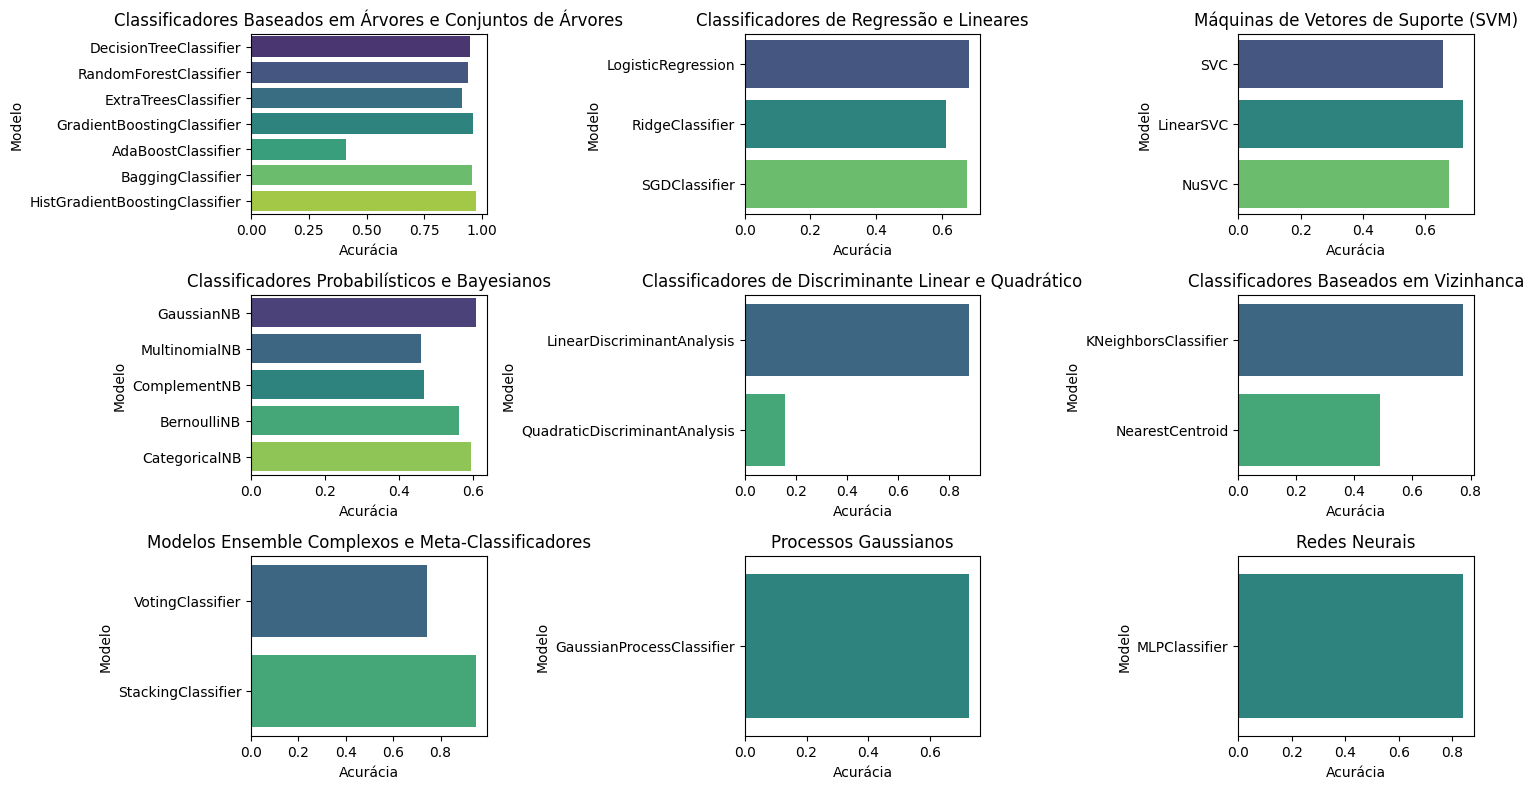


M√©tricas de Avalia√ß√£o dos Modelos:
                                            Categoria  \
0   Classificadores Baseados em √Årvores e Conjunto...   
1   Classificadores Baseados em √Årvores e Conjunto...   
2   Classificadores Baseados em √Årvores e Conjunto...   
3   Classificadores Baseados em √Årvores e Conjunto...   
4   Classificadores Baseados em √Årvores e Conjunto...   
5   Classificadores Baseados em √Årvores e Conjunto...   
6   Classificadores Baseados em √Årvores e Conjunto...   
7             Classificadores de Regress√£o e Lineares   
8             Classificadores de Regress√£o e Lineares   
9             Classificadores de Regress√£o e Lineares   
10               M√°quinas de Vetores de Suporte (SVM)   
11               M√°quinas de Vetores de Suporte (SVM)   
12               M√°quinas de Vetores de Suporte (SVM)   
13       Classificadores Probabil√≠sticos e Bayesianos   
14       Classificadores Probabil√≠sticos e Bayesianos   
15       Classificadores Probabil√

In [2]:
# Importa√ß√µes necess√°rias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Carregar o dataset
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
data = pd.read_csv(dataset_name)

# Separar as vari√°veis preditoras e a vari√°vel alvo
X = data.drop(columns=['NObeyesdad']) if 'NObeyesdad' in data.columns else data.iloc[:, :-1]  # 'NObeyesdad' como alvo
y = data['NObeyesdad'] if 'NObeyesdad' in data.columns else data.iloc[:, -1]  # assumindo que o alvo √© a √∫ltima coluna

# Codificar a vari√°vel alvo se for categ√≥rica
y = LabelEncoder().fit_transform(y) if y.dtype == 'object' else y

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir os classificadores em categorias
classificadores = {
    'Classificadores Baseados em √Årvores e Conjuntos de √Årvores': [
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier(),
        GradientBoostingClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        HistGradientBoostingClassifier()
    ],
    'Classificadores de Regress√£o e Lineares': [
        LogisticRegression(max_iter=200),
        RidgeClassifier(),
        SGDClassifier()
    ],
    'M√°quinas de Vetores de Suporte (SVM)': [
        SVC(),
        LinearSVC(),
        NuSVC()
    ],
    'Classificadores Probabil√≠sticos e Bayesianos': [
        GaussianNB(),
        MultinomialNB(),
        ComplementNB(),
        BernoulliNB(),
        CategoricalNB()
    ],
    'Classificadores de Discriminante Linear e Quadr√°tico': [
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()
    ],
    'Classificadores Baseados em Vizinhanca': [
        KNeighborsClassifier(),
        RadiusNeighborsClassifier(),
        NearestCentroid()
    ],
    'Modelos Ensemble Complexos e Meta-Classificadores': [
        VotingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC())], voting='hard'),
        StackingClassifier(estimators=[('rf', RandomForestClassifier()), ('svc', SVC())], final_estimator=LogisticRegression())
    ],
    'Processos Gaussianos': [
        GaussianProcessClassifier()
    ],
    'Redes Neurais': [
        MLPClassifier(max_iter=300)
    ]
}

# Fun√ß√£o para treinar, avaliar e coletar resultados
resultados = []
for categoria, modelos in classificadores.items():
    for modelo in modelos:
        try:
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            resultados.append({
                'Categoria': categoria,
                'Modelo': modelo.__class__.__name__,
                'Acur√°cia': acc,
                'F1 Score': f1
            })
        except Exception as e:
            print(f"Erro ao treinar {modelo.__class__.__name__}: {e}")

# Converter os resultados para DataFrame
resultados_df = pd.DataFrame(resultados)

# Plotar os gr√°ficos para cada categoria
categorias = resultados_df['Categoria'].unique()
plt.figure(figsize=(15, 8))
for i, categoria in enumerate(categorias, 1):
    plt.subplot(3, 3, i)
    subset = resultados_df[resultados_df['Categoria'] == categoria]
    sns.barplot(x='Acur√°cia', y='Modelo', data=subset, palette='viridis')
    plt.title(f'{categoria}')
    plt.xlabel('Acur√°cia')
plt.tight_layout()
plt.show()

# Exibir os resultados finais
print("\nM√©tricas de Avalia√ß√£o dos Modelos:")
print(resultados_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:972: RuntimeWa

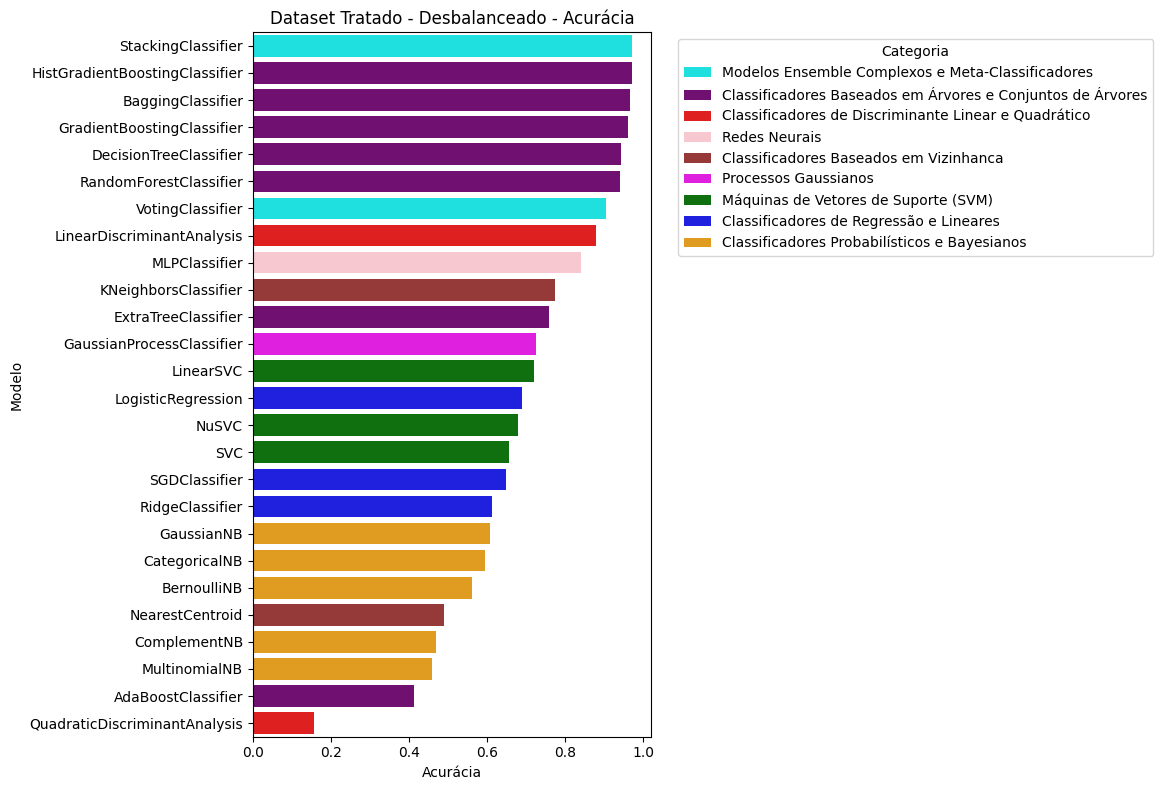

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              AdaBoostClassifier, BaggingClassifier, StackingClassifier, VotingClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

# Carregar o dataset
data = pd.read_csv('dataset_tratado.csv')
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicion√°rio de classificadores organizados por categoria
classificadores = {
    "Classificadores Baseados em √Årvores e Conjuntos de √Årvores": {
        "DecisionTreeClassifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(),
        "ExtraTreeClassifier": ExtraTreeClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(),
        "AdaBoostClassifier": AdaBoostClassifier(),
        "BaggingClassifier": BaggingClassifier(),
        "HistGradientBoostingClassifier": HistGradientBoostingClassifier()

    },
    "Classificadores de Regress√£o e Lineares": {
        "LogisticRegression": LogisticRegression(),
        "RidgeClassifier": RidgeClassifier(),
        "SGDClassifier": SGDClassifier(),
    },
    "M√°quinas de Vetores de Suporte (SVM)": {
        "SVC": SVC(),
        "LinearSVC": LinearSVC(),
        "NuSVC": NuSVC(),
    },
    "Classificadores Probabil√≠sticos e Bayesianos": {
        "GaussianNB": GaussianNB(),
        "MultinomialNB": MultinomialNB(),
        "ComplementNB": ComplementNB(),
        "BernoulliNB": BernoulliNB(),
        "CategoricalNB": CategoricalNB(),
    },
    "Classificadores de Discriminante Linear e Quadr√°tico": {
        "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
        "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    },
    "Classificadores Baseados em Vizinhanca": {
        "KNeighborsClassifier": KNeighborsClassifier(),
        "NearestCentroid": NearestCentroid(),
    },
    "Modelos Ensemble Complexos e Meta-Classificadores": {
        "VotingClassifier": VotingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC(probability=True))
        ], voting='soft'),
        "StackingClassifier": StackingClassifier(estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('svc', SVC(probability=True))
        ]),
    },
    "Processos Gaussianos": {
        "GaussianProcessClassifier": GaussianProcessClassifier(),
    },
    "Redes Neurais": {
        "MLPClassifier": MLPClassifier(max_iter=300),
    },
}

# Resultados de desempenho
resultados = []

# Avaliar cada classificador com hiperpar√¢metros b√°sicos e ajustados
for categoria, modelos in classificadores.items():
    for nome, modelo in modelos.items():
        try:
            # Treinar e avaliar o modelo
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            acuracia = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            resultados.append({"Categoria": categoria, "Modelo": nome, "Acur√°cia": acuracia, "F1 Score": f1})
        except Exception as e:
            print(f"Erro ao treinar {nome}: {e}")

# Converter resultados em DataFrame
resultados_df = pd.DataFrame(resultados)

# Ordenar os classificadores por Acur√°cia
resultados_df = resultados_df.sort_values(by='Acur√°cia', ascending=False)

# Definir cores para cada categoria
cores_categorias = {
    "Classificadores Baseados em √Årvores e Conjuntos de √Årvores": "purple",
    "Classificadores de Regress√£o e Lineares": "blue",
    "M√°quinas de Vetores de Suporte (SVM)": "green",
    "Classificadores Probabil√≠sticos e Bayesianos": "orange",
    "Classificadores de Discriminante Linear e Quadr√°tico": "red",
    "Classificadores Baseados em Vizinhanca": "brown",
    "Modelos Ensemble Complexos e Meta-Classificadores": "cyan",
    "Processos Gaussianos": "magenta",
    "Redes Neurais": "pink",
}

# Adicionar uma coluna de cores ao DataFrame
resultados_df['Cor'] = resultados_df['Categoria'].map(cores_categorias)

# Plotar o gr√°fico consolidado
plt.figure(figsize=(12, 8))
sns.barplot(data=resultados_df, x="Acur√°cia", y="Modelo", hue="Categoria", dodge=False, palette=cores_categorias)
plt.title('Dataset Tratado - Desbalanceado - Acur√°cia')
plt.xlabel('Acur√°cia')
plt.ylabel('Modelo')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## An√°lise de Desempenho dos Classificadores no Dataset Desbalanceado

O gr√°fico acima apresenta o desempenho de diversos classificadores aplicados a um dataset desbalanceado. A m√©trica utilizada para a avalia√ß√£o foi a **Acur√°cia**, e os classificadores foram organizados por categoria para melhor compreens√£o.

### 1. Modelos Ensemble Complexos e Meta-Classificadores
   - **StackingClassifier** e **VotingClassifier** mostraram alto desempenho, com **StackingClassifier** alcan√ßando a maior acur√°cia geral.
   - Esses modelos combinam a for√ßa de m√∫ltiplos classificadores, melhorando a precis√£o em rela√ß√£o aos classificadores individuais. Eles s√£o ideais para cen√°rios onde se deseja robustez e precis√£o, mas podem ser computacionalmente mais caros.

### 2. Classificadores Baseados em √Årvores e Conjuntos de √Årvores
   - **HistGradientBoostingClassifier**, **BaggingClassifier**, **GradientBoostingClassifier**, **DecisionTreeClassifier** e **RandomForestClassifier** obtiveram acur√°cias elevadas, destacando-se entre os melhores.
   - Esses modelos s√£o altamente eficazes em lidar com dados complexos e desbalanceados, j√° que aproveitam a combina√ß√£o de v√°rias √°rvores de decis√£o. Os classificadores baseados em √°rvores s√£o populares por sua interpretabilidade e pela boa capacidade de generaliza√ß√£o em dados complexos.

### 3. Classificadores de Discriminante Linear e Quadr√°tico
   - **LinearDiscriminantAnalysis** obteve um desempenho razo√°vel, destacando-se nesta categoria.
   - **QuadraticDiscriminantAnalysis**, por outro lado, apresentou um desempenho muito baixo, indicando que este m√©todo pode n√£o ser adequado para este conjunto de dados. Este modelo √© mais sens√≠vel a suposi√ß√µes de distribui√ß√£o dos dados, o que pode ter impactado negativamente.

### 4. Redes Neurais
   - **MLPClassifier** teve um desempenho satisfat√≥rio, demonstrando que uma rede neural cl√°ssica √© capaz de capturar padr√µes relevantes, mesmo com um dataset desbalanceado.
   - Contudo, seu desempenho foi inferior aos melhores classificadores baseados em √°rvores e ensembles, sugerindo que redes mais profundas ou t√©cnicas de balanceamento poderiam melhorar a performance.

### 5. Classificadores Baseados em Vizinhanca
   - **KNeighborsClassifier** apresentou uma acur√°cia moderada, sendo superior ao **NearestCentroid**.
   - Classificadores baseados em vizinhan√ßa s√£o sens√≠veis a dados desbalanceados, j√° que exemplos minorit√°rios podem ser "sobrepujados" pelos dados da maioria, o que pode justificar o desempenho mediano.

### 6. Processos Gaussianos
   - **GaussianProcessClassifier** obteve uma acur√°cia aceit√°vel, embora inferior aos modelos de √°rvores e ensembles.
   - Este modelo √© poderoso, mas pode ser computacionalmente caro, especialmente em datasets maiores. Pode ser mais adequado para dados bem distribu√≠dos e com um n√∫mero limitado de amostras.

### 7. M√°quinas de Vetores de Suporte (SVM)
   - **LinearSVC**, **NuSVC** e **SVC** apresentaram acur√°cias moderadas, com **LinearSVC** sendo o melhor entre eles.
   - SVMs s√£o modelos robustos e eficientes, mas podem enfrentar dificuldades com datasets altamente desbalanceados, j√° que se concentram em maximizar margens entre classes, o que pode n√£o ser eficaz em situa√ß√µes de classes desbalanceadas.

### 8. Classificadores de Regress√£o e Lineares
   - **LogisticRegression** teve desempenho razo√°vel, seguido por **SGDClassifier** e **RidgeClassifier** com acur√°cias inferiores.
   - Esses modelos lineares podem ser adequados para dados bem comportados e balanceados, mas s√£o menos eficazes em dados complexos e desbalanceados, onde m√©todos n√£o lineares tendem a se destacar.

### 9. Classificadores Probabil√≠sticos e Bayesianos
   - **GaussianNB** teve o melhor desempenho entre os modelos Bayesianos, enquanto os demais (como **MultinomialNB**, **ComplementNB**, **BernoulliNB** e **CategoricalNB**) apresentaram acur√°cias baixas.
   - Classificadores Bayesianos s√£o r√°pidos e interpret√°veis, mas frequentemente enfrentam dificuldades em datasets com alta complexidade e desbalanceamento, como √© o caso aqui.

## Conclus√£o

Os modelos ensemble, especialmente **StackingClassifier** e **HistGradientBoostingClassifier**, destacaram-se com as maiores acur√°cias. Classificadores baseados em √°rvores tamb√©m apresentaram desempenhos elevados, sendo uma escolha robusta para datasets desbalanceados. Modelos lineares e Bayesianos tiveram acur√°cias mais baixas, indicando que s√£o menos adequados para este conjunto de dados espec√≠fico.


## Usando os 5 Melhores Classificadores

<Figure size 1200x800 with 0 Axes>

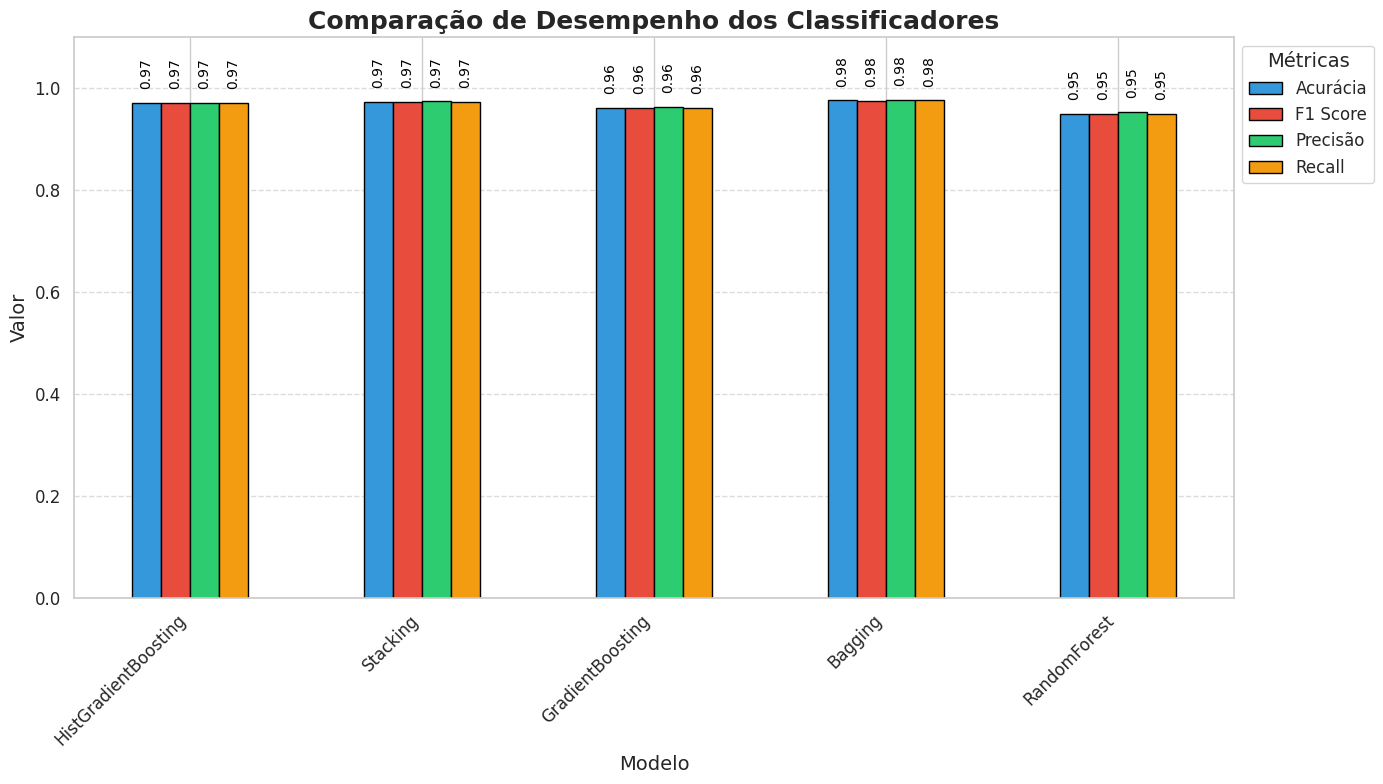

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier,
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Carregar o dataset
data = pd.read_csv('dataset_tratado.csv')
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dicion√°rio de classificadores a serem avaliados
classificadores = {
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier())
        ]
    ),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "RandomForest": RandomForestClassifier(),
}

# Resultados de desempenho
resultados = []

# Avaliar cada classificador
for nome, modelo in classificadores.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precisao = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    resultados.append({
        "Modelo": nome,
        "Acur√°cia": acuracia,
        "F1 Score": f1,
        "Precis√£o": precisao,
        "Recall": recall,
    })

# Converter resultados em DataFrame
resultados_df = pd.DataFrame(resultados)
resultados_df = resultados_df.set_index("Modelo")

# Configura√ß√£o do estilo e tamanho
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Plotar o gr√°fico de barras
ax = resultados_df.plot(kind="bar", figsize=(14, 8), color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'], edgecolor="black")
plt.title("Compara√ß√£o de Desempenho dos Classificadores", fontsize=18, fontweight='bold')
plt.xlabel("Modelo", fontsize=14)
plt.ylabel("Valor", fontsize=14)
plt.ylim(0, 1.1)

# Adicionar valores nas barras com mais espa√ßamento
for container in ax.containers:
    ax.bar_label(container, labels=[f"{v.get_height():.2f}" for v in container], label_type="edge", padding=10, fontsize=10, color="black", rotation=90)

# Configura√ß√£o da legenda
plt.legend(title="M√©tricas", title_fontsize=14, fontsize=12, loc="upper left", bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gr√°fico
plt.tight_layout()
plt.show()
